In [1]:
import io 
import json 
import cv2 
import numpy as np 
import requests 
import matplotlib.pyplot as plt  

In [2]:
img = cv2.imread("C:\\Users\\Documents\\Downloads\\AVENA-VAINILLA-SKUs1.jpg")
height, width, _ = img.shape
height
width,height

(1823, 2309)

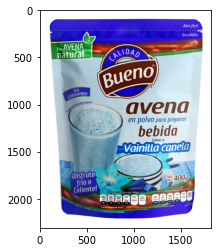

In [3]:
plt.imshow(img)

In [4]:
url_api = "https://api.ocr.space/parse/image"

In [5]:
url_api = "https://api.ocr.space/parse/image"
_, compressedimage = cv2.imencode(".jpg", img, [1, 90])
file_bytes = io.BytesIO(compressedimage)

In [6]:
result = requests.post(url_api,
              files = {"AVENA-VAINILLA-SKUs1.jpg": file_bytes},
              data = {"apikey": "your_api_key", #you have to free register on http://ocr.space/OCRAPI to get an unique api key
                      "language": "eng"})

In [7]:
result = result.content.decode()
result = json.loads(result)

In [8]:
result

{'ParsedResults': [{'TextOverlay': {'Lines': [],
    'HasOverlay': False,
    'Message': 'Text overlay is not provided as it is not requested'},
   'TextOrientation': '0',
   'FileParseExitCode': 1,
   'ParsedText': "AVENA\r\nnituäl—\r\nSin\r\nc otorantes\r\nresentaciön\r\nImagen\r\nalusiva\r\nal sabot\r\nAbrefåcil\r\nResellable\r\nDAO\r\ngueno@\r\navena\r\nen POIVO para preparar\r\nbebida\r\nSabora:\r\nVainilla canela\r\ncou400g\r\nUn vasode 250 ml lectr gcremada• aporta\r\npr envose ap.'\r\n% degos•nutrirnentos diarios\r\n% de nutrimentos diarios\r\n13.3 porciones\r\npor envase aprox.\r\n",
   'ErrorMessage': '',
   'ErrorDetails': ''}],
 'OCRExitCode': 1,
 'IsErroredOnProcessing': False,
 'ProcessingTimeInMilliseconds': '781',
 'SearchablePDFURL': 'Searchable PDF not generated as it was not requested.'}

In [9]:
parsed_results = result.get("ParsedResults")[0]
text_detected = parsed_results.get("ParsedText")
text_detected

"AVENA\r\nnituäl—\r\nSin\r\nc otorantes\r\nresentaciön\r\nImagen\r\nalusiva\r\nal sabot\r\nAbrefåcil\r\nResellable\r\nDAO\r\ngueno@\r\navena\r\nen POIVO para preparar\r\nbebida\r\nSabora:\r\nVainilla canela\r\ncou400g\r\nUn vasode 250 ml lectr gcremada• aporta\r\npr envose ap.'\r\n% degos•nutrirnentos diarios\r\n% de nutrimentos diarios\r\n13.3 porciones\r\npor envase aprox.\r\n"

In [10]:
import re

In [13]:
def clean_data(text,remove_digits=False):
    pattern=r'[^a-zA-Z0-9\s]' if not remove_digits else r'[^a-zA-Z\s]'
    text=re.sub(pattern,'',text)
    text=re.sub('\r\n',' ',text)
    return text

In [14]:
clean_data(text_detected,remove_digits=False)

'AVENA nitul Sin c otorantes resentacin Imagen alusiva al sabot Abrefcil Resellable DAO gueno avena en POIVO para preparar bebida Sabora Vainilla canela cou400g Un vasode 250 ml lectr gcremada aporta pr envose ap  degosnutrirnentos diarios  de nutrimentos diarios 133 porciones por envase aprox '

In [15]:
clean_data(text_detected,remove_digits=True)

'AVENA nitul Sin c otorantes resentacin Imagen alusiva al sabot Abrefcil Resellable DAO gueno avena en POIVO para preparar bebida Sabora Vainilla canela coug Un vasode  ml lectr gcremada aporta pr envose ap  degosnutrirnentos diarios  de nutrimentos diarios  porciones por envase aprox '